# **Project Name :-** Regional Sales Analysis

## Libraries setup and Configuration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

## Data Ingestion

In [2]:
sheets = pd.read_excel('Regional Sales Dataset.xlsx', sheet_name=None)

df_sales       = sheets['Sales Orders']
df_customers   = sheets['Customers']
df_products    = sheets['Products']
df_regions     = sheets['Regions']
df_state_reg   = sheets['State Regions']
df_budgets     = sheets['2017 Budgets']

## Data Profiling

In [3]:
print(f"df_sales      shape: {df_sales.shape}      -  Sales Orders")
print(f"df_customers  shape: {df_customers.shape}  -  Customers")
print(f"df_products   shape: {df_products.shape}   -  Products")
print(f"df_regions    shape: {df_regions.shape}    -  Regions")
print(f"df_state_reg  shape: {df_state_reg.shape}  -  State Regions")
print(f"df_budgets    shape: {df_budgets.shape}    -  2017 Budgets")

df_sales      shape: (64104, 12)      -  Sales Orders
df_customers  shape: (175, 2)  -  Customers
df_products   shape: (30, 2)   -  Products
df_regions    shape: (994, 15)    -  Regions
df_state_reg  shape: (49, 3)  -  State Regions
df_budgets    shape: (30, 2)    -  2017 Budgets


In [4]:
print("\n— df_sales head —")
display(df_sales.head())
print()

print("\n— df_customers head —")
display(df_customers.head())
print()

print("\n— df_products head —")
display(df_products.head())
print()

print("\n— df_regions head —")
display(df_regions.head())
print()

print("\n— df_state_reg head —")
display(df_state_reg.head())
print()

print("\n— df_budgets head —")
display(df_budgets.head())


— df_sales head —


,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270




— df_customers head —


,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd




— df_products head —


,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5




— df_regions head —


,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago




— df_state_reg head —


,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West




— df_budgets head —


,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [5]:
new_header        = df_state_reg.iloc[0]      
df_state_reg.columns = new_header             
df_state_reg       = df_state_reg[1:].reset_index(drop=True)  

In [6]:
print("\n— df_sales null —")
display(df_sales.isnull().sum())
print()

print("\n— df_customers null —")
display(df_customers.isnull().sum())
print()

print("\n— df_products null —")
display(df_products.isnull().sum())
print()

print("\n— df_regions null —")
display(df_regions.isnull().sum())
print()

print("\n— df_state_reg null —")
display(df_state_reg.isnull().sum())
print()

print("\n— df_budgets null —")
display(df_budgets.isnull().sum())


— df_sales null —


OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64



— df_customers null —


Customer Index    0
Customer Names    0
dtype: int64



— df_products null —


Index           0
Product Name    0
dtype: int64



— df_regions null —


id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64



— df_state_reg null —


0
State Code    0
State         0
Region        0
dtype: int64



— df_budgets null —


Product Name    0
2017 Budgets    0
dtype: int64

In [7]:
print("\n— df_sales duplictes —")
display(df_sales.duplicated().sum())
print()

print("\n— df_customers duplictes —")
display(df_customers.duplicated().sum())
print()

print("\n— df_products duplictes —")
display(df_products.duplicated().sum())
print()

print("\n— df_regions duplictes —")
display(df_regions.duplicated().sum())
print()

print("\n— df_state_reg duplictes —")
display(df_state_reg.duplicated().sum())
print()

print("\n— df_budgets duplictes —")
display(df_budgets.duplicated().sum())


— df_sales duplictes —


np.int64(0)



— df_customers duplictes —


np.int64(0)



— df_products duplictes —


np.int64(0)



— df_regions duplictes —


np.int64(0)



— df_state_reg duplictes —


np.int64(0)



— df_budgets duplictes —


np.int64(0)

In [8]:
pd.set_option('display.max_columns',None)

## Data cleaning and Wrangling

In [9]:
# Here we are merging all the tables 

df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)

df = df.merge(
    df_state_reg[["State Code","Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

df = df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)


df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,State Code,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27,364,Savannah,Chatham County,GA,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,GA,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20,488,Greenwood,Johnson County,IN,Indiana,City,39.61366,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,IN,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26,155,Pleasanton,Alameda County,CA,California,City,37.66243,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,CA,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7,473,Bloomington,Monroe County,IN,Indiana,City,39.16533,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,IN,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8,256,Manchester,Hartford County,CT,Connecticut,Town,41.77524,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,CT,Northeast,1085037.329


In [10]:
# converting column_name to lower and replcing space with '_'     

df.columns = df.columns.str.lower().str.strip().str.replace(' ','_')

In [11]:
# reneming columns for better understanding

df = df.rename(columns={
    'order_quantity' : 'quantity',
    'line_total' : 'revenue',
    'total_unit_cost' : 'cost',
    '2017_budgets' : 'budget'
    })

In [12]:
df.shape

(64104, 34)

In [13]:
# removing unnecessary columns which are not usefull for analysis

df = df.drop(columns = ['customer_name_index', 'currency_code', 'warehouse_code', 'delivery_region_index', 'product_description_index', 'customer_index', 'index', 'id', 'state_code', 'area_code', 'time_zone',])

In [14]:
df.shape

(64104, 22)

In [15]:
# checking information about data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ordernumber     64104 non-null  object        
 1   orderdate       64104 non-null  datetime64[ns]
 2   channel         64104 non-null  object        
 3   quantity        64104 non-null  int64         
 4   unit_price      64104 non-null  float64       
 5   revenue         64104 non-null  float64       
 6   cost            64104 non-null  float64       
 7   customer_names  64104 non-null  object        
 8   product_name    64104 non-null  object        
 9   name            64104 non-null  object        
 10  county          64104 non-null  object        
 11  state           64104 non-null  object        
 12  type            64104 non-null  object        
 13  latitude        64104 non-null  float64       
 14  longitude       64104 non-null  float64       
 15  po

In [16]:
# checking statistical summary of data

df.describe(include='all')

,ordernumber,orderdate,channel,quantity,unit_price,revenue,cost,customer_names,product_name,name,county,state,type,latitude,longitude,population,households,median_income,land_area,water_area,region,budget
count,64104,64104,64104,64104.000000,64104.000000,64104.000000,64104.000000,64104,64104,64104,64104,64104,64104,64104.000000,64104.000000,6.410400e+04,6.410400e+04,64104.000000,6.410400e+04,6.410400e+04,64104,6.410400e+04
unique,10684,NaN,3,NaN,NaN,NaN,NaN,175,30,922,411,47,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,SO - 000225,NaN,Wholesale,NaN,NaN,NaN,NaN,Kare Corp,Product 25,Springfield,Los Angeles County,California,City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,West,NaN
freq,6,NaN,34596,NaN,NaN,NaN,NaN,540,5994,343,2785,12000,46449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19540,NaN
mean,NaN,2016-01-29 01:28:20.935979008,NaN,8.441689,2284.380803,19280.682937,1432.083899,NaN,NaN,NaN,NaN,NaN,NaN,37.769427,-94.247116,1.590968e+05,5.702520e+04,59396.944325,1.278377e+08,1.287047e+07,NaN,2.998558e+06
min,NaN,2014-01-01 00:00:00,NaN,5.000000,167.500000,837.500000,68.675000,NaN,NaN,NaN,NaN,NaN,NaN,25.468720,-123.262040,5.013800e+04,0.000000e+00,0.000000,2.575149e+06,0.000000e+00,NaN,5.944716e+05
25%,NaN,2015-01-13 00:00:00,NaN,6.000000,1031.800000,8019.900000,606.216000,NaN,NaN,NaN,NaN,NaN,NaN,33.953330,-112.034140,6.106800e+04,2.263900e+04,43163.000000,4.865395e+07,2.807360e+05,NaN,1.672229e+06
50%,NaN,2016-01-27 00:00:00,NaN,8.000000,1855.900000,14023.100000,1084.495500,NaN,NaN,NaN,NaN,NaN,NaN,39.114170,-88.200900,8.329800e+04,2.951800e+04,53587.500000,8.434784e+07,1.264402e+06,NaN,3.016489e+06
75%,NaN,2017-02-13 00:00:00,NaN,10.000000,3606.275000,27416.400000,2046.933750,NaN,NaN,NaN,NaN,NaN,NaN,41.676550,-80.407000,1.286670e+05,4.540900e+04,71897.000000,1.283868e+08,4.850146e+06,NaN,3.925425e+06
max,NaN,2018-02-28 00:00:00,NaN,12.000000,6566.000000,78711.600000,5498.556000,NaN,NaN,NaN,NaN,NaN,NaN,48.759550,-70.255330,8.550405e+06,3.113535e+06,149837.000000,1.935873e+09,8.521186e+08,NaN,5.685138e+06


In [17]:
df.describe()

,orderdate,quantity,unit_price,revenue,cost,latitude,longitude,population,households,median_income,land_area,water_area,budget
count,64104,64104.000000,64104.000000,64104.000000,64104.000000,64104.000000,64104.000000,6.410400e+04,6.410400e+04,64104.000000,6.410400e+04,6.410400e+04,6.410400e+04
mean,2016-01-29 01:28:20.935979008,8.441689,2284.380803,19280.682937,1432.083899,37.769427,-94.247116,1.590968e+05,5.702520e+04,59396.944325,1.278377e+08,1.287047e+07,2.998558e+06
min,2014-01-01 00:00:00,5.000000,167.500000,837.500000,68.675000,25.468720,-123.262040,5.013800e+04,0.000000e+00,0.000000,2.575149e+06,0.000000e+00,5.944716e+05
25%,2015-01-13 00:00:00,6.000000,1031.800000,8019.900000,606.216000,33.953330,-112.034140,6.106800e+04,2.263900e+04,43163.000000,4.865395e+07,2.807360e+05,1.672229e+06
50%,2016-01-27 00:00:00,8.000000,1855.900000,14023.100000,1084.495500,39.114170,-88.200900,8.329800e+04,2.951800e+04,53587.500000,8.434784e+07,1.264402e+06,3.016489e+06
75%,2017-02-13 00:00:00,10.000000,3606.275000,27416.400000,2046.933750,41.676550,-80.407000,1.286670e+05,4.540900e+04,71897.000000,1.283868e+08,4.850146e+06,3.925425e+06
max,2018-02-28 00:00:00,12.000000,6566.000000,78711.600000,5498.556000,48.759550,-70.255330,8.550405e+06,3.113535e+06,149837.000000,1.935873e+09,8.521186e+08,5.685138e+06
std,NaN,2.276217,1663.598141,15429.602766,1107.705728,5.068599,16.884334,3.997688e+05,1.437733e+05,21556.192739,1.783448e+08,5.804327e+07,1.558775e+06


In [18]:
# converting orderdate column into datetime data type from object datatype

df['orderdate'] = pd.to_datetime(df['orderdate'])

In [19]:
# filling Null values in budget column where year is not 2017

df.loc[df['orderdate'].dt.year != 2017, 'budget'] = pd.NA

In [20]:
df[['orderdate','product_name','budget']].head(10)

,orderdate,product_name,budget
0,2014-01-01,Product 27,NaN
1,2014-01-01,Product 20,NaN
2,2014-01-01,Product 26,NaN
3,2014-01-01,Product 7,NaN
4,2014-01-01,Product 8,NaN
5,2014-01-01,Product 23,NaN
6,2014-01-01,Product 1,NaN
7,2014-01-01,Product 25,NaN
8,2014-01-01,Product 13,NaN
9,2014-01-01,Product 14,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ordernumber     64104 non-null  object        
 1   orderdate       64104 non-null  datetime64[ns]
 2   channel         64104 non-null  object        
 3   quantity        64104 non-null  int64         
 4   unit_price      64104 non-null  float64       
 5   revenue         64104 non-null  float64       
 6   cost            64104 non-null  float64       
 7   customer_names  64104 non-null  object        
 8   product_name    64104 non-null  object        
 9   name            64104 non-null  object        
 10  county          64104 non-null  object        
 11  state           64104 non-null  object        
 12  type            64104 non-null  object        
 13  latitude        64104 non-null  float64       
 14  longitude       64104 non-null  float64       
 15  po

In [22]:
# making a new column income_group from median_income column

income_bins = [0, 40000, 60000, 80000, np.inf]
income_labels = ['Low', 'Lower-Middle', 'Upper-Middle', 'High']

df['income_group'] = pd.cut(df['median_income'], bins=income_bins, labels=income_labels)
df['income_group'].value_counts()

income_group
Lower-Middle    28838
Upper-Middle    14399
High            11144
Low              9623
Name: count, dtype: int64

## Feature Engineering

In [23]:
df.columns

Index(['ordernumber', 'orderdate', 'channel', 'quantity', 'unit_price',
       'revenue', 'cost', 'customer_names', 'product_name', 'name', 'county',
       'state', 'type', 'latitude', 'longitude', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'region', 'budget',
       'income_group'],
      dtype='object')

In [24]:
# Making some new columns for analysis

df['total_cost'] = df['quantity'] * df['cost']
df['profit'] = df['revenue'] - df['total_cost']
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100
df['order_month_name'] = df['orderdate'].dt.month_name()
df['order_month_num'] = df['orderdate'].dt.month

In [25]:
df.head()

,ordernumber,orderdate,channel,quantity,unit_price,revenue,cost,customer_names,product_name,name,county,state,type,latitude,longitude,population,households,median_income,land_area,water_area,region,budget,income_group,total_cost,profit,profit_margin_pct,order_month_name,order_month_num
0,SO - 000225,2014-01-01,Wholesale,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,Savannah,Chatham County,Georgia,City,32.08354,-81.09983,145674,52798,36466,268318796,13908113,South,NaN,Low,10946.058,4048.542,27.0,January,1
1,SO - 0003378,2014-01-01,Distributor,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,Greenwood,Johnson County,Indiana,City,39.61366,-86.10665,55586,20975,54176,72276415,1883,Midwest,NaN,Lower-Middle,13969.098,11899.602,46.0,January,1
2,SO - 0005126,2014-01-01,Wholesale,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,Pleasanton,Alameda County,California,City,37.66243,-121.87468,79510,26020,124759,62489257,386195,West,NaN,High,4108.440,1760.760,30.0,January,1
3,SO - 0005614,2014-01-01,Export,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,Bloomington,Monroe County,Indiana,City,39.16533,-86.52639,84067,30232,30019,60221613,475857,Midwest,NaN,Low,7201.964,9166.136,56.0,January,1
4,SO - 0005781,2014-01-01,Wholesale,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,Manchester,Hartford County,Connecticut,Town,41.77524,-72.52443,58007,24141,63158,70972793,720300,Northeast,NaN,Upper-Middle,10082.160,8249.040,45.0,January,1


## Univariate Analysis

#### **Categorical Columns**  
- channel, order_date, product_name, state, order_month_name, order_month_num, order_month, region, income_group, county

#### **Numerical Columns**
- quantity, unit_price, revenue, cost, population, households, median_income, land_area, water_area, budget, total_cost, profit, profit_margin_pct 

### **Revenue Distribution Plot (Histogram)**

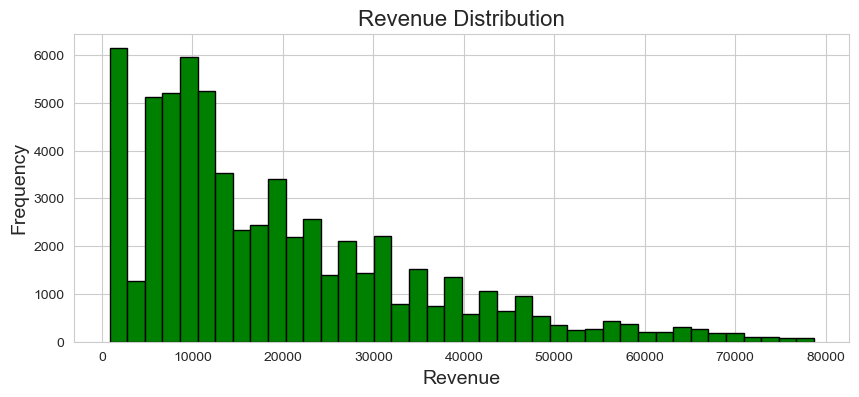

In [26]:
plt.figure(figsize=(10,4))

plt.hist(
    df['revenue'],
    bins=40,
    color='green',
    edgecolor='black'
    )

plt.title('Revenue Distribution', fontsize=16)
plt.xlabel('Revenue', fontsize=14)   
plt.ylabel('Frequency', fontsize=14)

plt.show()

**Conclusion for this plot**
- The distribution is highly right-skewed, indicating that most orders generate revenue of $10,000 or less.
- A few orders generate very high revenue (over $50,000), but these are rare.
- Overall, revenue ranges from $0 to around $80,000.

### **Profit Distribution Plot (Histogram)**

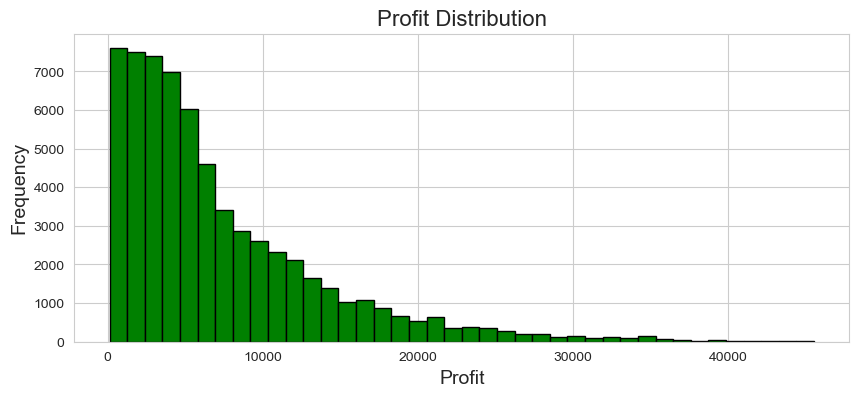

In [27]:
plt.figure(figsize=(10,4))

plt.hist(
    df['profit'],
    bins=40,
    color='green',
    edgecolor='black'
    )

plt.title('Profit Distribution', fontsize=16)
plt.xlabel('Profit', fontsize=14)   
plt.ylabel('Frequency', fontsize=14)

plt.show()

**Conclusion for this plot**
- The distribution is highly right-skewed, indicating that most orders generate profit less than $6,000.
- A few orders generate very high prfit (over $30,000), but these are rare.
- Overall, profit ranges from $0 to around $40,000.

### **Income Distribution Plot (Histogram)**

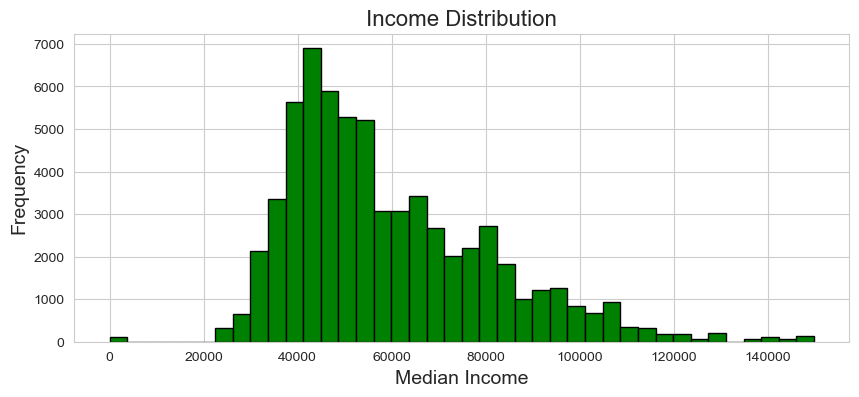

In [28]:
plt.figure(figsize=(10,4))

plt.hist(
    df['median_income'],
    bins=40,
    color='green',
    edgecolor='black'
    )

plt.title('Income Distribution', fontsize=16)
plt.xlabel('Median Income', fontsize=14)   
plt.ylabel('Frequency', fontsize=14)

plt.show()

**Conclusion for this plot**

- The distribution nearly follows normal distribution.
- Most people’s income lies between $30,000 – $60,000, with peak near $40,000 – $45,000.
- Very few people earn above $100,000, but they are few.

### **Average Order Value Distribution Plot (Histogram)**

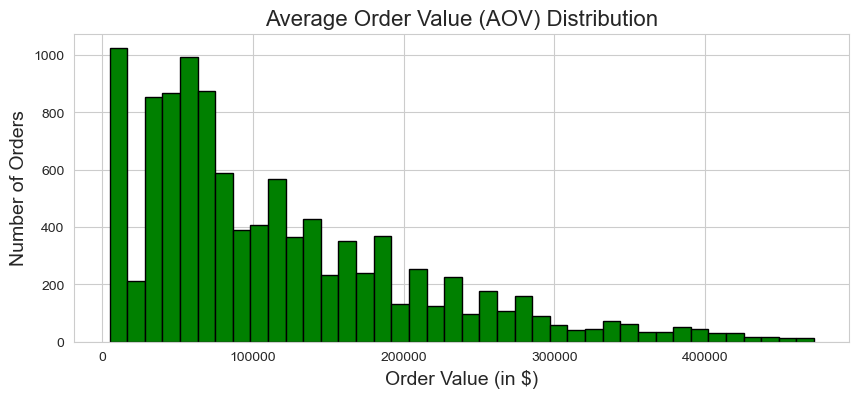

In [29]:
aov = df.groupby('ordernumber')['revenue'].sum()

plt.figure(figsize=(10,4))

plt.hist(
    aov,
    bins=40,
    color='green',
    edgecolor='black'
    )

plt.title('Average Order Value (AOV) Distribution', fontsize=16)
plt.xlabel('Order Value (in $)', fontsize=14)   
plt.ylabel('Number of Orders', fontsize=14)

plt.show()

**Conclusion for this plot**

- The distribution is right-skewed, showing that most orders are on the lower side, and only few very high-value orders exist.
- Maximum orders are below 100,000$, especially in the 0–50,000$ range.
- Very few orders go beyond 200,000$, which creates the long tail on the right.

### **Monthly Sales Trend (Line Plot)**

In [30]:
df['order_month'] = df['orderdate'].dt.to_period('M')
monthly_sales = df.groupby('order_month')['revenue'].sum().reset_index()

monthly_sales['order_month'] = monthly_sales['order_month'].dt.to_timestamp()

monthly_sales['revenue_m'] = monthly_sales['revenue'] / 1e6

fig = px.line(monthly_sales, x='order_month', y='revenue_m', markers=True)

fig.update_traces(
    line=dict(color='magenta'),
    marker=dict(color='magenta', size=8)
)

fig.update_layout(
    title = "<b>Monthly Sales Trend</b>",
    xaxis_title="Month",
    yaxis_title="Total Revenue (in Millions)",
    title_font=dict(color='black',size=20, ),
    title_x=0.5,
    xaxis=dict(tickformat="%b %Y"), 
    template="plotly_white",
    autosize=True,
    height=400
)

fig.show()

**Conclusion for this plot**

- Sales mostly cycles between $23M – $26M, showing small ups and downs.
- A big drop happened around February 2017 (~21M).
- After that, sales picked up again and stayed mostly stable till 2018.

### **Overall Monthly Sales Trend (Line Plot)**

In [31]:
df_complete_year = df[df['orderdate'].dt.year != 2018]

monthly_sales = (df_complete_year.groupby(['order_month_num', 'order_month_name'])['revenue'].sum().reset_index().sort_values('order_month_num'))

monthly_sales['revenue_m'] = monthly_sales['revenue'] / 1e6

fig = px.line(
    monthly_sales,
    x='order_month_name',
    y='revenue_m',
    markers=True,
    title="<b>Overall Monthly Sales Trend (Excluding 2018)</b>"
)

fig.update_traces(
    line=dict(color='magenta'),
    marker=dict(color='magenta', size=8)
)

fig.update_layout(
    title_x=0.5,  
    title_font=dict(color='black', size=20),
    xaxis_title="Month",
    yaxis_title="<b>Total Revenue (in Millions)</b>", 
    template="plotly_white",
    autosize=True,
    height=400
)

fig.show()

**Conclusion for this plot**

- Sales were lowest in February (~91M).
- Highest sales came in May (~102M) and August (~102M).
- From September to December, sales stayed stable around 100–101M.

### **Sales by Channel (Pie Chart)**

In [32]:
sales_by_channel = (
    df.groupby('channel')['revenue'].sum().sort_values(ascending=False).reset_index()
)

fig = px.pie(
    sales_by_channel,
    values='revenue',
    names='channel',
    title="<b>Sales by Channel</b>",
    color_discrete_sequence=px.colors.qualitative.Pastel  

)

fig.update_traces(
    textinfo='percent+label',   
    pull=[0.01]*len(sales_by_channel)  
)

fig.update_layout(
    title_x=0.5,  
    title_font=dict(color='black', size=18)
)

fig.show()

**Conclusion for this plot**

- Wholesale is the biggest contributer among all the channels to the total sales with 54% share.
- Distributors channel contributes about 31% to the total sales.
- Export has the smallest share, only 15%.

### **Revenue by Product Name (Bar Chart)**

In [33]:
top_10_products = (
                    df.groupby('product_name')['revenue']
                    .sum()
                    .sort_values(ascending=False)
                    .head(10)
                    .reset_index()
                  )

top_10_products['revenue_m'] = top_10_products['revenue'] / 1e6

fig = px.bar(
    top_10_products,
    x='product_name',
    y='revenue_m',
    title="<b>Top 10 Products by Revenue</b>",
    text=top_10_products['revenue_m'].round(1).astype(str) + "M",  
    color='revenue_m',
    color_continuous_scale='teal'  
)

fig.update_layout(
    title_x=0.5,
    title_font=dict(color='black', size=18),
    xaxis_title="Product Name",
    yaxis_title="Total Revenue (Millions) (in $)",
    template="plotly_white",
    autosize=True,
    height=450
)

fig.update_xaxes(tickangle=45)

fig.show()


**Conclusion for this plot**
- Product 26 and Product 25 are the top performers, with contribution of 18% to the total sales over($100M) each.
- Other products in the top 10 range between 51M USD to 78M USD, with Product 13 being the strongest among them.

### **Top 10 country by Revenue (Bar Chart)**

In [34]:
top_10_country = (
                    df.groupby('county')['revenue']
                    .sum()
                    .sort_values(ascending=False)
                    .head(10)
                    .reset_index()
                  )

top_10_country['revenue_m'] = top_10_country['revenue'] / 1e6

fig = px.bar(
    top_10_country,
    x='county',
    y='revenue_m',
    title="<b>Top 10 Country by Revenue</b>",
    text=top_10_products['revenue_m'].round(1).astype(str) + "M",  
    color='revenue_m',
    color_continuous_scale='teal'  
)

fig.update_layout(
    title_x=0.5,
    title_font=dict(color='black', size=20),
    xaxis_title="Product Name",
    yaxis_title="Total Revenue (Millions) (in $)",
    template="plotly_white",
    autosize=True,
    height=450
)

fig.update_xaxes(tickangle=45)

fig.show()


**Conclusion for this plot**
- Los Angeles and Cook (Country) performs heigher, with contribution of 8% to the total sales.
- After that, revenue drops a lot — Orange County has only 78M USD.
- The other counties are lower, all between 50M–75M USD.

### **Revenue by Income group (Pie chart)**

In [35]:
sales_by_channel = (
    df.groupby('income_group')['revenue'].sum().sort_values(ascending=False).reset_index()
)

fig = px.pie(
    sales_by_channel,
    values='revenue',
    names='income_group',
    title="<b>Sales by Income Group</b>",
    color_discrete_sequence=px.colors.qualitative.Pastel  

)

fig.update_traces(
    textinfo='percent+label',   
    pull=[0.01]*len(sales_by_channel)  
)

fig.update_layout(
    title_x=0.5,  
    title_font=dict(color='black', size=18)
)

fig.show()

C:\Users\Shivam Kasaudhan\AppData\Local\Temp\ipykernel_2316\1672570652.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



**Conclusion for this plot**

- Most sales come from the Lower-Middle group (45%).
- Upper-Middle group is second highest contributer wit the share of 22% to the total share.
- High (18%) and Low (15%) Income groups have smaller shares compared to others.

### **Revenue by region (Donut Chart)**

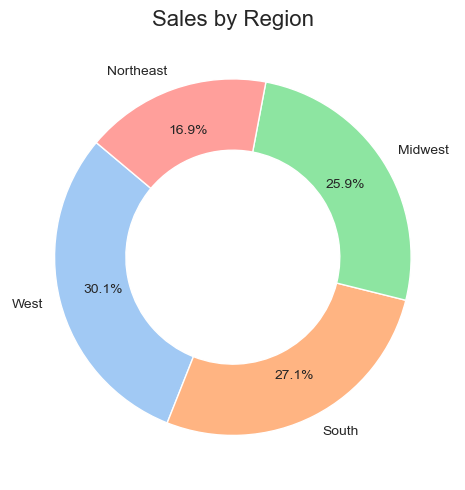

In [36]:
sales_by_channel = df.groupby('region')['revenue'].sum().sort_values(ascending=False)

plt.figure(figsize = (6,5))

plt.pie(
    sales_by_channel.values,
    labels = sales_by_channel.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')[0:len(sales_by_channel)],
    wedgeprops={'width':0.4},
    pctdistance=0.75,   
)

plt.title('Sales by Region', fontsize=16)

plt.tight_layout()
plt.show()

**Conclusion for this plot**
- West region contributes most to the sales with the share of 30% to the total sales.
- South and Midwest region contribute approximately same to the total sales.
- Northwest region contributes less to the sales among all regions.

### **Unit Price V/S Profit Margin Percentage (Scatter plot)**

In [43]:
fig = px.scatter(
    df,
    x="unit_price",
    y="profit_margin_pct",
    opacity=0.6,
    color_discrete_sequence=['green'],
    title="<b>Profit Margin % vs. Unit Price</b>"
)

fig.update_layout(
    xaxis_title="Unit Price",
    yaxis_title="Profit Margin (%)",
    autosize= True,
    height=500,
    title_x = 0.5,
    title_font = dict(color='black', size=20) 
)

fig.show()

**Conclusion for this plot**

- Profit margin mostly falls between 15%–60% across all products.
- No clear link is seen between unit price and profit margin %.
- Both low and high-priced items show a wide spread of margins.

### **Sales by state (Map Plot)**

In [38]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}
state_sales = (
    df
    .groupby('state')['revenue']
    .sum()
    .reset_index()
)
state_sales['revenue_m'] = state_sales['revenue'] / 1e6

state_sales['state_code'] = state_sales['state'].map(us_state_abbrev)

fig = px.choropleth(
    state_sales,
    locations='state_code',       # now using codes
    locationmode='USA-states',
    color='revenue_m',
    scope='usa',
    labels={'revenue_m':'Total Sales (M USD)'},
    color_continuous_scale='Blues',
    hover_data={'state':True, 'revenue_m':':.2f'}
)


fig.update_layout(
    title={
        'text': "🗺️ Total Sales by State",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    margin=dict(l=0, r=0, t=40, b=0),
    coloraxis_colorbar=dict(
        title='Sales (M USD)',
        ticksuffix='M'
    )
)

fig.show()

### **Revenue by Customer names**

In [39]:
top_rev = (
    df.groupby('customer_names')['revenue']
      .sum()                        
      .sort_values(ascending=False) 
      .head(10)                     
)

bottom_rev = (
    df.groupby('customer_names')['revenue']
      .sum()                        
      .sort_values(ascending=True)  
      .head(10)                     
)
import plotly.graph_objects as go
from plotly.subplots import make_subplots

top_rev_m = top_rev / 1e6
bottom_rev_m = bottom_rev / 1e6

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Top 10 Customers by Revenue", "Bottom 10 Customers by Revenue"),
    horizontal_spacing=0.15
)

fig.add_trace(
    go.Bar(
        x=top_rev_m.values,
        y=top_rev_m.index,
        orientation="h",
        marker=dict(color=top_rev_m.values, colorscale="Blues")
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=bottom_rev_m.values,
        y=bottom_rev_m.index,
        orientation="h",
        marker=dict(color=bottom_rev_m.values, colorscale="Reds")
    ),
    row=1, col=2
)

fig.update_layout(
    width=950,
    height=500,
    showlegend=False,
    title_text="<b>Customer Revenue Analysis</b>",
    xaxis_title="Revenue (Million USD)",
    xaxis2_title="Revenue (Million USD)",
    yaxis_title="Customer Name",
    yaxis2_title="Customer Name",
    title_x = 0.5,
    title_font=dict(color='black', size=20)
)

fig.show()

**Conclusion for this plot**

- Aibox Company and State Ltd are the top revenue contributors, each generating above 12 million USD with contribution of 2% of total sales.
- The lowest revenue comes from BB17 Company and Yodoo Ltd, both contributing less than 4.5 million USD  with contribution of only 0.67% of total sales.
- Overall, the top 10 customers generate higher revenue compared to the bottom 10 customers.

### **Average Profit margin % by Channel**

In [40]:
channel_margin = (
    df.groupby("channel")["profit_margin_pct"]
      .mean()
      .sort_values(ascending=False)
      .reset_index()
)

fig = px.bar(
    channel_margin,
    x="channel",
    y="profit_margin_pct",
    text=channel_margin["profit_margin_pct"].round(2).astype(str) + "%",
    color="profit_margin_pct",
    color_continuous_scale="viridis",
    title="Average Profit Margin % by Channel"
)

fig.update_traces(textposition="outside")
fig.update_layout(
    xaxis_title="Channel",
    yaxis_title="Average Profit Margin (%)",
    width=800,
    height=500
)

fig.show()

**Conclusion for this plot**

- Export channel has the highest average profit margin (37.93%).
- Distributor is slightly lower at 37.56%.
- Wholesale shows the lowest margin (37.09%).

### **Correlation Matrix**

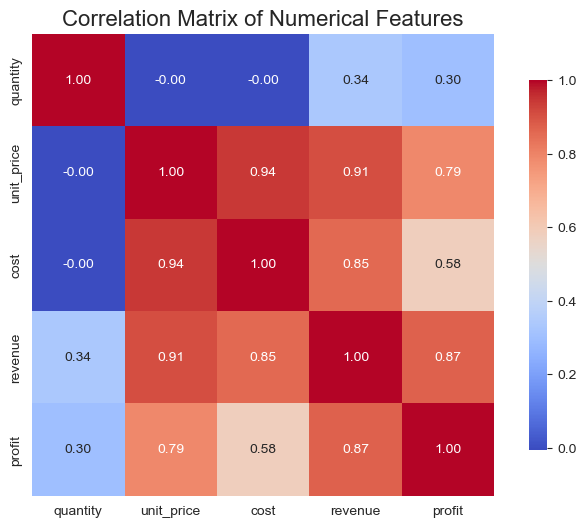

In [41]:
num_cols = ['quantity', 'unit_price', 'cost', 'revenue', 'profit']

corr = df[num_cols].corr()

plt.figure(figsize=(9,6))

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.show()  

**Conclusion for this plot**
- Unit price, cost, and revenue are highly correlated with each other (above 0.9).
- Profit has strong positive relation with revenue (0.87) and also good correlation with unit price (0.79).
- Quantity is almost not related to unit price and cost (close to 0 correlation), but has a weak positive relation with revenue (0.34) and profit (0.30).